In [20]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

import torch
from torch.utils.data import Dataset, DataLoader

In [1]:
!pip install roboflow

  Using cached roboflow-1.1.28-py3-none-any.whl.metadata (9.3 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl.metadata (722 bytes)
  Using cached idna-2.10-py2.py3-none-any.whl.metadata (9.1 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
Using cached roboflow-1.1.28-py3-none-any.whl (74 kB)
Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
Using cached opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl (38.0 MB)
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    U

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2  Python-3.10.14 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
Setup complete  (16 CPUs, 31.9 GB RAM, 172.7/465.1 GB disk)


In [3]:
import os
from roboflow import Roboflow

os.mkdir('C:/Users/aiotu/Projects/GradProj/AI/image_segmentation/datasets2')
os.chdir('C:/Users/aiotu/Projects/GradProj/AI/image_segmentation/datasets2')

from roboflow import Roboflow
rf = Roboflow(api_key="wIwiZJgd5Jdz0gp2KcZc")
project = rf.workspace("myproject-1dhrs").project("math_problem_segmentation")
version = project.version(5)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.2, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to math_problem_segmentation-5 in yolov8:: 100%|██████████| 292/292 [00:00<00:00, 2780.96it/s]


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

Ultralytics YOLOv8.2.2 🚀 Python-3.10.14 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\Users\aiotu\Projects\GradProj\AI\image_segmentation\datasets2\math_problem_segmentation-5/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=


  0%|          | 0.00/6.23M [00:00<?, ?B/s]
  6%|▌         | 384k/6.23M [00:00<00:01, 3.43MB/s]
 34%|███▍      | 2.12M/6.23M [00:00<00:00, 11.3MB/s]
100%|██████████| 6.23M/6.23M [00:00<00:00, 22.2MB/s]
C:\Users\aiotu\anaconda3\envs\py310\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,

train: Scanning C:\Users\aiotu\Projects\GradProj\AI\image_segmentation\datasets2\math_problem_segmentation-5\train\labels...:   0%|          | 0/98 [00:00<?, ?it/s]
train: Scanning C:\Users\aiotu\Projects\GradProj\AI\image_segmentation\datasets2\math_problem_segmentation-5\train\labels... 65 images, 0 backgrounds, 0 corrupt:  66%|██████▋   | 65/98 [00:00<00:00, 607.39it/s]
train: Scanning C:\Users\aiotu\Projects\GradProj\

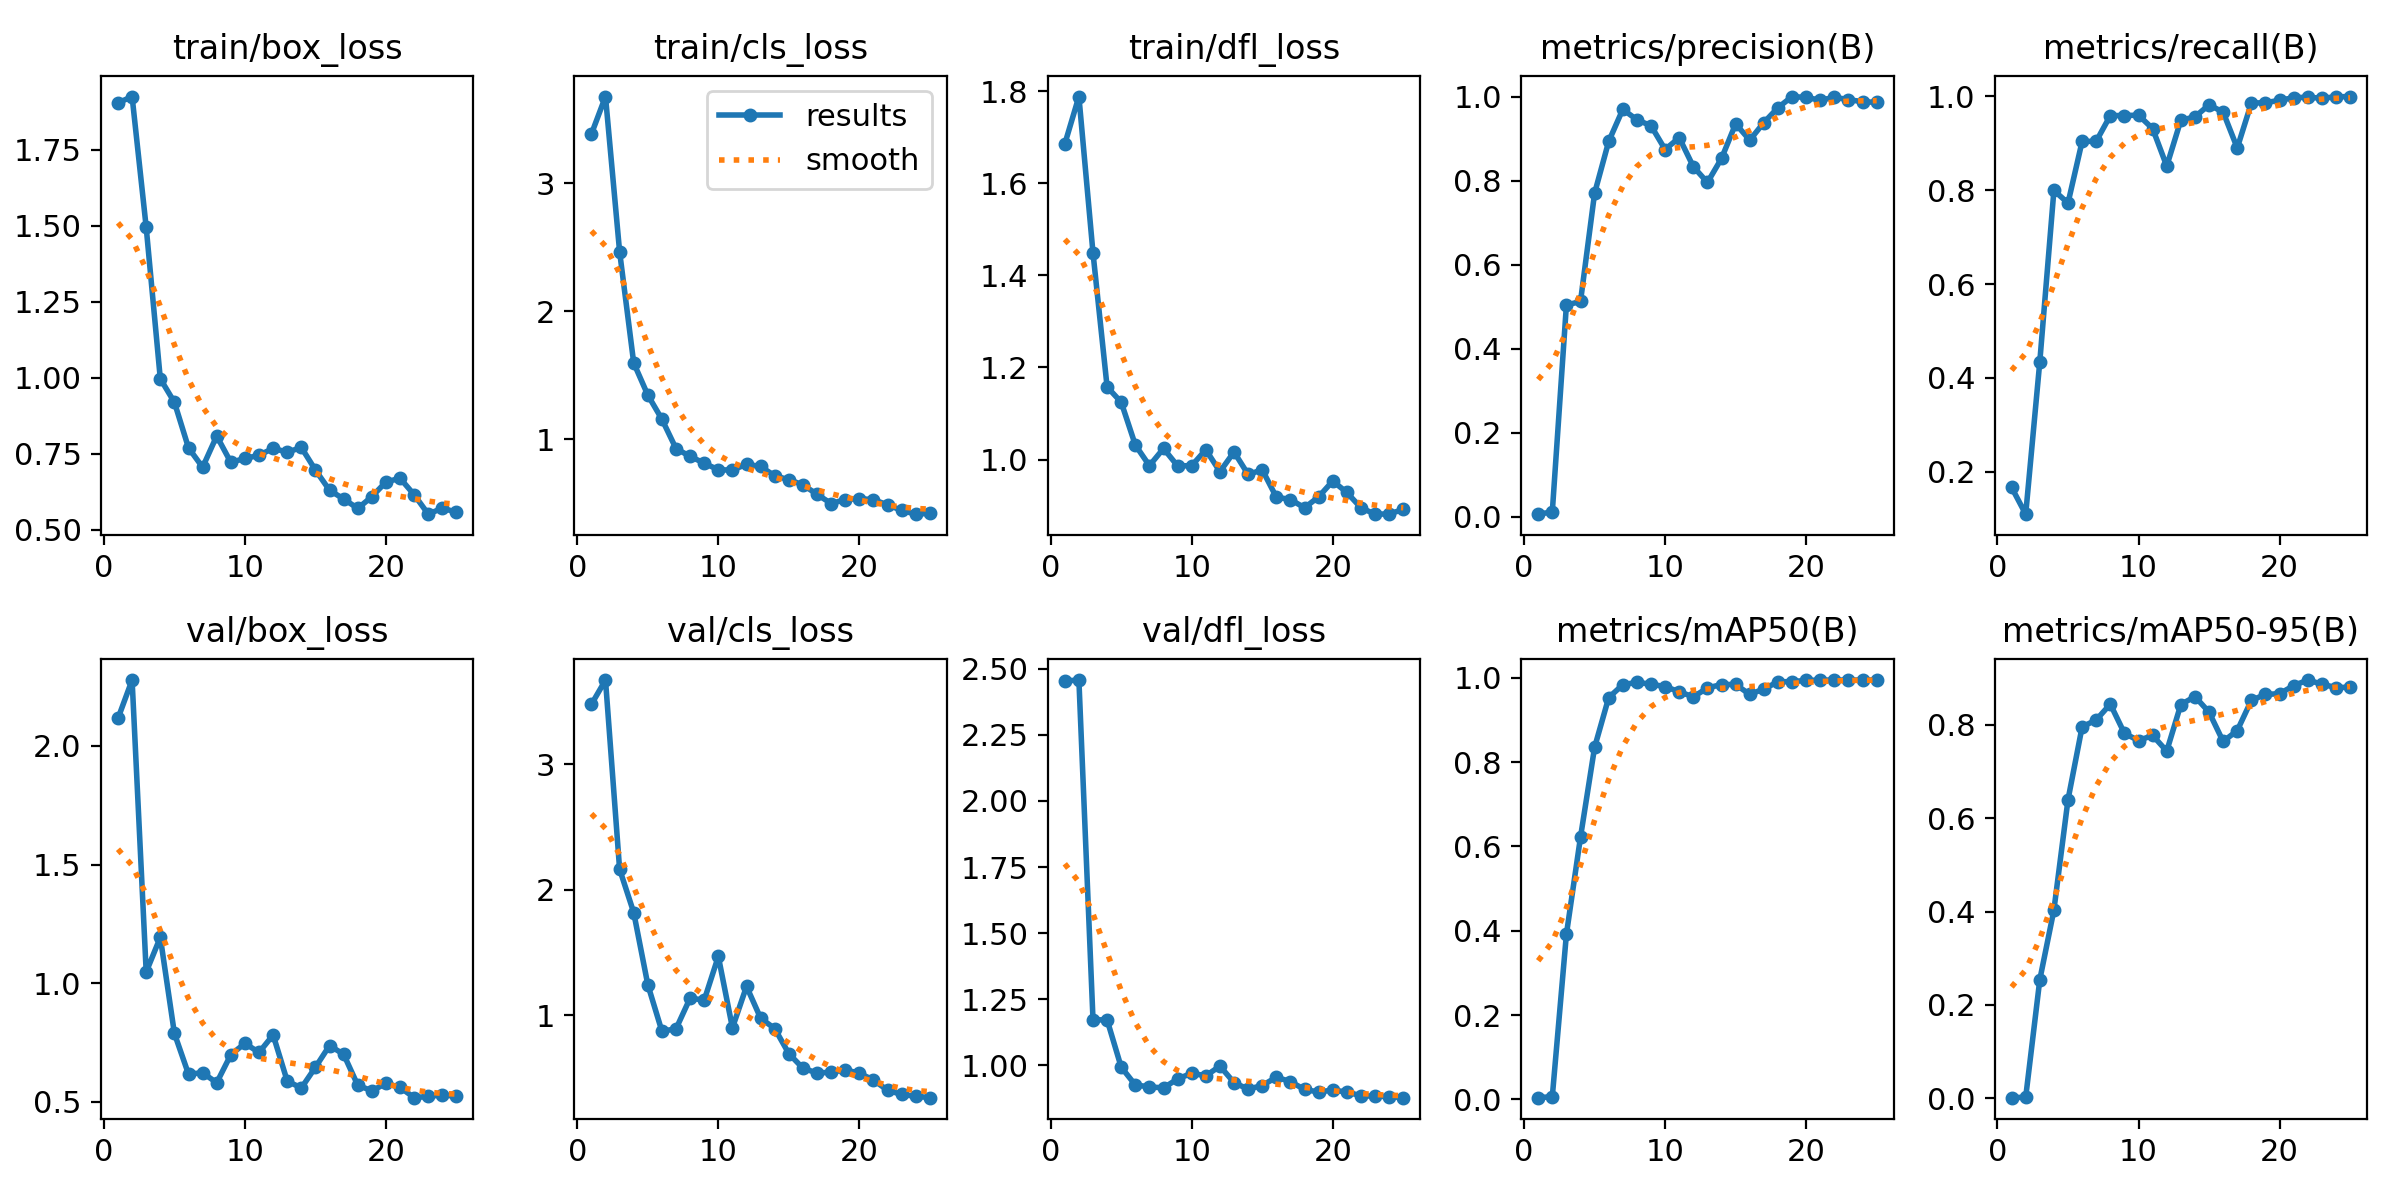

In [38]:
from IPython.display import display, Image
Image(filename=f'C:/Users/aiotu/Projects/GradProj/AI/image_segmentation/datasets/runs/detect/train/confusion_matrix.png', width=600)
Image(filename=f'C:/Users/aiotu/Projects/GradProj/AI/image_segmentation/datasets/runs/detect/train/results.png', width=600)

In [8]:
!yolo task=detect mode=predict model=./runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.2.2 🚀 Python-3.10.14 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/13 C:\Users\aiotu\Projects\GradProj\AI\image_segmentation\datasets2\math_problem_segmentation-5\test\images\-A_-_-02_png.rf.db912bad02e45eee356957347e4b9f4e.jpg: 800x800 3 multiples, 9.0ms
image 2/13 C:\Users\aiotu\Projects\GradProj\AI\image_segmentation\datasets2\math_problem_segmentation-5\test\images\-_-1-04_png.rf.a76725c3dd39d637b5fb368d2b1065ae.jpg: 800x800 2 multiples, 9.0ms
image 3/13 C:\Users\aiotu\Projects\GradProj\AI\image_segmentation\datasets2\math_problem_segmentation-5\test\images\-_-1-05_png.rf.d8e0943a58465889778561c2f1da3a5e.jpg: 800x800 2 multiples, 9.0ms
image 4/13 C:\Users\aiotu\Projects\GradProj\AI\image_segmentation\datasets2\math_problem_segmentation-5\test\images\-_-1-13_png.rf.a49c0ce36087acae6aca309f8b25966e.jpg: 800x800 2 multiples, 10.0ms
image 5/13 C:\Users\aiotu\

In [11]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"C:/Users/aiotu/Projects/GradProj/AI/image_segmentation/datasets/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.2, to fix: `pip install ultralytics==8.0.196`
View the status of your deployment at: https://app.roboflow.com/myproject-1dhrs/math_problem_segmentation/5
Share your model with the world at: https://universe.roboflow.com/myproject-1dhrs/math_problem_segmentation/model/5


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

In [24]:
import ultralytics
import os, random
from roboflow import Roboflow
import subprocess
import glob
# ultralytics.checks()

def model_predict(image_dir, save_dir):
    # os.chdir(r'C:\Users\aiotu\Projects\GradProj\AI\image_segmentation\datasets2')
    os.chdir(r'C:\Users\aiotu\Projects\GradProj\AI\image_segmentation\datasets2')


    rf = Roboflow(api_key="wIwiZJgd5Jdz0gp2KcZc")
    project = rf.workspace("myproject-1dhrs").project("math_problem_segmentation")
    model = project.version(5).model


    # infer on a local image
    # print(model.predict("your_image.jpg", confidence=40, overlap=30).json())

    print(image_dir)
    print(os.curdir)
    for i, image in enumerate(os.listdir(rf"{image_dir}")): 
        print(i)
        model.predict(image_dir + "\\" + image, confidence=40, overlap=30).save(save_dir + "\\" + f"{i}_preprocessed.png")
        if i == 10:
            break

    # infer on an image hosted elsewhere
    # print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

model_predict(r"C:\Users\aiotu\Projects\GradProj\AI\Image_segmentation\png_files\[블랙라벨] 수학 II", "C:\\Users\\aiotu\\Projects\\GradProj\\cheada_fastapi\\cheada\\globalUtils\\temp_problem_storage")

loading Roboflow workspace...
loading Roboflow project...
C:\Users\aiotu\Projects\GradProj\AI\Image_segmentation\png_files\[블랙라벨] 수학 II
.
0
1
2
3
4
5
6
7
8
9
10
